<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*

## Notebook 10: Continuous random variables
In this notebook we deal with continuous distributions. We start with analyzing data that we generate ourselves, and we will consider real data at the end of this Notebook.

The most common probability distribution is probably (no pun intended) the Normal distribution. Random numbers from a Normal distribution may be generated with the `standard_normal` function in the `random` subpackage of `numpy`. The numbers are drawn from a "standard" Normal distribution, which means a Normal distribution with mean 0 and standard deviation 1. The mean and standard deviation of a dataset can be computed with the functions `mean` and `std` of the `numpy` package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

In [2]:
data = rnd.standard_normal(100)  # Array with 100 values
print('mean of data: ', np.mean(data))
print('standard deviation of data: ', np.std(data))

mean of data:  -0.104004650064
standard deviation of data:  0.967720515888


Note that the mean and standard deviation of the 100 numbers drawn from the standard normal disribution are not exactly equal to 0 and 1, respectively. These are, after all, only estimates of the true underlying mean and standard deviation. These estimates are called the sample mean and sample standard deviation (of 100 numbers drawn from a Normal distribution). Run the above code several times. Each time, a new set of 100 random numbers is drawn, with a slightly different mean and standard deviation. We'll get back to that later. 

To generate numbers from a Normal distribution with mean $\mu$ and standard deviation $\sigma$, draw numbers from the standard Normal distribution, multiply all values by $\sigma$ and then add $\mu$ (see [here](http://www.statlect.com/ucdnrm1.htm)).

In [3]:
mu = 6.0
sig = 2.0
data = sig * rnd.standard_normal(100) + mu
print('mean of data:', np.mean(data))
print('standard deviation of data:', np.std(data))

mean of data: 6.38361616296
standard deviation of data: 1.85591745068


### Histograms
Probably the first things to do when you obtain a new data set, is to look at the data. One way to do that is to draw a histogram. For a histogram, you count how many data points fall within a certain interval. For example, how many data points are between 5 and 6. These intervals are called bins. The bar graph of the number of data points in each bin is called a histogram. The function to compute and plot a histogram is called `hist` and is part of the `matplotlib` package. The simplest way of plotting a histogram is to let `hist` decide what bins to use; the default number of bins is `nbin=10`; `hist` even figures out where to put the limits of the bins. The `hist` function creates a histogram graph and returns a tuple of three items. The first item is an array of length `nbin` with the number of data points in each bin. The second item is an array of length `nbin+1` with the limits of the bins. The third item is a list of objects that represent the bars of the histogram; we won't use this last item here. 

In the code cell below, we make a histogram of 100 points drawn from a Normal distribution. Note that with a dataset of 100 points, the histogram doesn't look too much like the typical bell-shaped curve of a Normal distribution, even though the data points are actually drawn from a real Normal distribution. Run the code below several times to see how it changes with a new random set of 100 data points.

number of data points in each bin: [  4.   5.  13.  30.  22.  16.   5.   4.   0.   1.]
limits of the bins: [  0.98087616   2.16027772   3.33967928   4.51908084   5.69848239
   6.87788395   8.05728551   9.23668707  10.41608863  11.59549019
  12.77489174]


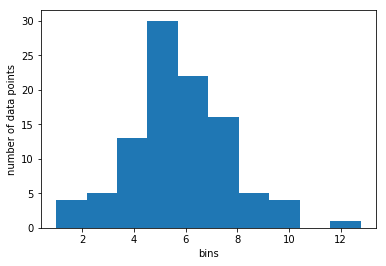

In [4]:
mu = 6.0
sig = 2.0
data = sig * rnd.standard_normal(100) + mu
a = plt.hist(data)
plt.xlabel('bins')
plt.ylabel('number of data points')
print('number of data points in each bin:', a[0])
print('limits of the bins:', a[1])

As you can see from the previous example, the limits of the bins are not chosen as nice numbers: `hist` takes the minimum and maximum value of the data and divides it in `nbin` equal intervals. You can specify the number of bins with the `bins` keyword, and the range (minimum and maximum limits of the bins) with the `range` keyword (you want to do this most times). If data values are outside this range (such as outliers), they are ignored. In the code below, 12 bins are chosen equally spaced from 0 to 12. Note that we use the same date as for the graph above, but by simply choosing different bins the histogram looks quite different.

number of data points in each bin: [  1.   2.   4.  10.  14.  29.  16.  12.   7.   2.   2.   0.]
limits of the bins: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]


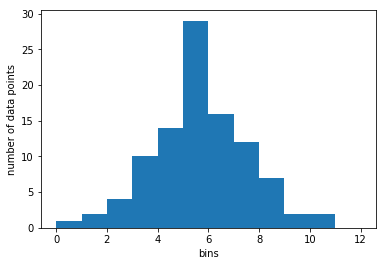

In [5]:
a = plt.hist(data, bins=12, range=(0, 12))
print('number of data points in each bin:', a[0])
print('limits of the bins:', a[1])
plt.xlabel('bins')
plt.ylabel('number of data points');

A line representing the underlying normal distribution may be added as follows. First import the `norm` class from the `scipy.stats` package. Then call the `norm.pdf` function (pdf stands for probability density function) to compute the values of the normal distribution given three arguments: the $x$ values where to compute the normal distribution, the mean, and the standard deviation. Let's add the normal distribution to the histogram we just created. The one thing we have to change in the histogram is the vertical axis. In the graph above, the vertical axis shows the number of data points. We need to normalize this so that the vertical axis gives the probability that a data point lies in a bin. The histogram may be normalized by specifying the `normed=True` keyword:

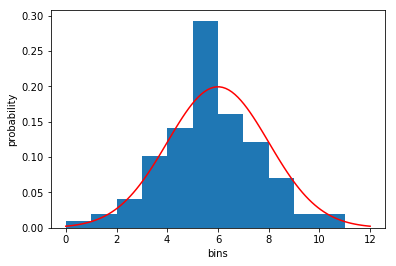

In [6]:
from scipy.stats import norm
a = plt.hist(data, bins=12, range=(0, 12), normed=True)
x = np.linspace(0, 12, 100)
y = norm.pdf(x, 6, 2) # mu=6, sig=2
plt.plot(x, y, 'r')
plt.xlabel('bins')
plt.ylabel('probability');

### Exercise 1: <a name="back1"></a>First histogram
Generate 1000 random numbers from a Normal distribution with mean 100 and standard deviation 10. Compute and print to the screen the mean and standard deviation of your data. Create two graphs above each other using the `plt.subplot` command (use `plt.subplot?` if you forgot how to do that). In the top graph, plot a histogram using 20 bins going from 50 to 150. Note that with this size of a data set (1000 data points), the histogram starts to look a lot more like the typical bell-shaped curve of a Normal distribution. Add a red line representing the probability density function of the underlying normal distribution to the graph. In the bottom graph, draw a histogram of the cumulative distribution function, by setting the keyword `cumulative=True` (see `plt.hist?` for details). For the latter graph, it may also be nice to use the keywords `histtype='step'` and `align='right'`. Add a red line representing the cumulative distribution function of the underlying normal distribution to the graph using the `norm.cdf` function, which works the same as the `norm.pdf` function but computes the cumulative distribution function (cdf). Finally, make sure the limits along the horizontal axis are the same for both graphs. 

<a href="#ex1answer">Answers to Exercise 1</a>

### Percentiles
Another useful description of a dataset are the percentiles or quantiles. For this we consider the ordered data, that is, we order the datapoints in ascending order (so the first datapoint is the minimum of the data and the last datapoint is the maximum). The 25 percentile is the data point in the ordered data such that 25% of the data is below this datapoint (and thus 75% is above this datapoint). The percentiles of a dataset are commonly referred to as the 'empirical percentiles' as they are the percentiles of the dataset, not of the underlying distribution. The 50 empirical percentile is equivalent to the median of the data. Common intervals to look at are the 50% region around the median (also called the interquartile range or IQR), which runs from the 25 empirical percentile to the 75 empirical percentile, and the 95% region, which runs from the 2.5 empirical percentile to the 97.5 empirical percentile. Percentiles of a dataset may be computed with the `percentile` function in the `numpy` package. The first argument is the data, the second argument is a list of percentiles:

In [7]:
data = 2 * rnd.standard_normal(100) + 10  # mu=10, sigma=2, 100 points
lower, median, upper = np.percentile(data, [2.5, 50, 97.5])
print('2.5 percentile:', lower)
print('50 percentile:', median)
print('97.5 percentile:', upper)
print('95% interval:', lower, ' to ', upper)

2.5 percentile: 6.26605608198
50 percentile: 9.83781731022
97.5 percentile: 13.7017418445
95% interval: 6.26605608198  to  13.7017418445


Theoretical percentiles of a given distribution may be computed with the `interval` function, which gives the interval around the median. For example, the 95% region for the standard normal distribution is given by

In [8]:
norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

This means that the 95 percentile runs from -1.96 times the standard deviation to +1.96 the standard deviation. 

### Expercise 2. <a name="back2"></a>Lower and upper quartile
Generate 100 data points from a normal distribution with a mean of 20 and a standard deviation of 4. Compute the interquartile range (25%-75% range). Compute the theoretical value of the interquartile range and compare it to the interquartile range of the data. Draw a histogram of the cumulative distribution. Add red vertical lines to your graph for the 25 and 75 empirical percentiles of the data, and black vertical lines for the 25 and 75 percentiles of the underlying distribution. Vertical lines that span the graph may be added with the `plt.axvline` function, which takes the $x$ value of the line as an argument. To specify the color of the vertical line, use the `color` keyword argument.

<a href="#ex2answer">Answers to Exercise 2</a>

### Box-whisker plots
Box-whisker plots (also simply referred to as boxplots) are a way to visualize the level and spread of the data. From a boxplot, you can see whether the data is symmetric or not, and how widely the data are spread. A box-whisker plot may be created with the `boxplot` function in the `matplotlib` package as follows

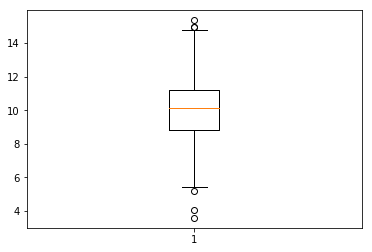

In [9]:
rnd.seed(10)
data = 2 * rnd.standard_normal(500) + 10.0  # mu=10, sigma=2, 500 points
a = plt.boxplot(data)

The `boxplot` function creates the graph and returns a lot of stuff such as 'boxes', 'caps', etc. These latter ones are handles to the different features of the graph; we will not use them here. What you see in the graph is a red line at the median of the data. The blue box spans the IQR ranging from the lower quartile (25%) to the upper quartile (75%). The whiskers are the black lines that are connected to the 50% box with the blue dashed lines. They extend to the most extreme data point within the `whis*IQR` data range, where the default value of `whis` is 1.5. Any data points falling outside the whiskers are potential outliers and are plotted as crosses. In this case there are 5 points outside the whiskers, but none are outliers. They were, after all, drawn from the same Normal distribution!

### Pandas
All the techniques described in this Notebook can also be done with the `pandas` package. `pandas` is often much easier as it has a lot more functionality, it can handle missing values (`NaN` values, for example), and the plots look pretty by default.

The `read_csv` function of `pandas` may be used to read data from a file and store it in a `DataFrame` (see `pandas` Notebook). A `DataFrame` may also be created from scratch. First, the `pandas` package is imported and called `pd`. Then an empty `DataFrame` is created and values are added to two columns by drawing from two different normal distributions; the columns are called `test1` and `test2`. The `describe` function of `pandas` gives a nice summary of the data, including the number of values, mean, standard deviation, min, 25%, 50%, 75%, and max values. 

In [10]:
import pandas as pd
data = pd.DataFrame()
data['test1'] = 2 * rnd.standard_normal(100) + 3
data['test2'] = 1 * rnd.standard_normal(100) + 5
data.describe()

,test1,test2
count,100.000000,100.000000
mean,2.862210,5.101536
std,1.883256,0.933086
min,-2.632002,3.012896
25%,1.487364,4.512289
50%,2.742579,5.003217
75%,4.158108,5.631319
max,8.343370,7.662577


Values such as `mean` or `max` may be obtained for the entire `DataFrame` or for one column at a time. The percentiles may be obtained with the `quantile` function.

In [11]:
print('minimum of test1:', data.test1.min())
print('standard deviation of the DataFrame:')
print(data.std())
print('5% and 95% precentiles of test2:')
print(data.test2.quantile([0.05,0.95]))

minimum of test1: -2.6320024343
standard deviation of the DataFrame:
test1    1.883256
test2    0.933086
dtype: float64
5% and 95% precentiles of test2:
0.05    3.535725
0.95    6.821249
Name: test2, dtype: float64


The histogram of the data in two columns may be created with the `hist` function of `pandas`. Notice that the `sharex` keyword is set to `True` so that the horizontal axis has the same length for both histograms (which facilitates comparison). The figure size is specified so that the figure is wider (10) than high (4).

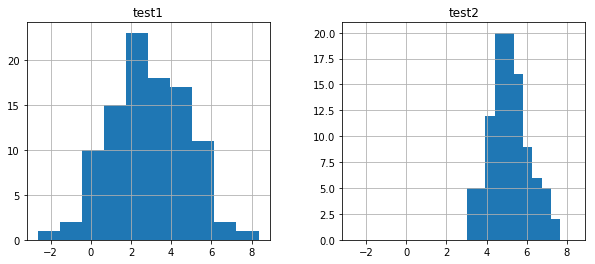

In [12]:
data.hist(sharex=True, figsize=(10, 4));

### Missing data
Real data often contains missing values. Every database has its own way of treating missing values. Some databases leave the value empty, others substitute a number that can easily be recognized (for example -9999). In `pandas` these values need to be converted to *Not A Number* using the `NaN` value of the `numpy package` (both `NaN` and `nan` work). In the code below, the value with index 5 in the `test1` column is changed to `nan`. A cumulative histogram may be obtained as (Note that the `plt.hist` function doesn't work on data that includes not-a-number values). 

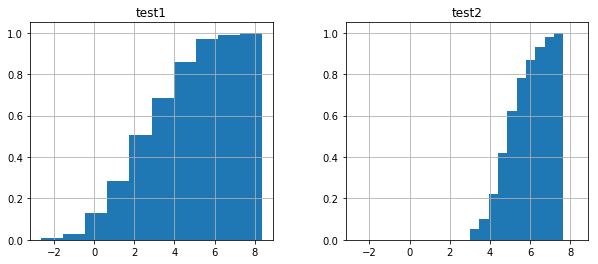

In [13]:
data.test1[5] = np.nan  # Replace the value with index 5 to nan
data.hist(cumulative=True, sharex=True, figsize=(10, 4), normed=True);

`pandas` also draws nice boxplots of a DataFrame.

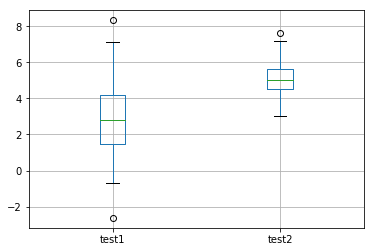

In [14]:
data.boxplot();

The histogram or boxplot of one column of a DataFrame may be obtained by specifying the column you want to plot

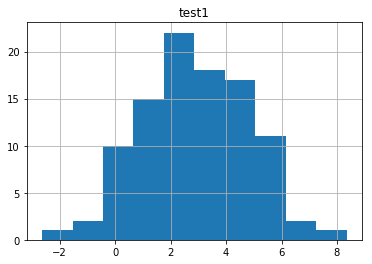

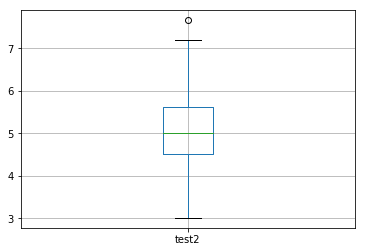

In [15]:
plt.figure()
a = data.hist(column='test1')  # Makes histogram of column test1
plt.figure()
a = data.boxplot(column='test2');  # Makes boxplot of column test2

### Unique values in a DataFrame
A useful `pandas` function is to determine the unique values in a DataFrame or in the column of a DataFrame.
As an example, let's make a DataFrame with 100 random integers between 1 and 10. You can find out the unique values in the column with the '.unique()' function

In [16]:
a = pd.DataFrame()
a['data'] = rnd.randint(1, 10 + 1, 100)
print('unique values in data column:', a['data'].unique())

unique values in data column: [ 6  7 10  2  8  1  3  9  4  5]


It is time to start applying our statistical techniques to real data, rather than datasets generated with a random number generator.

<figure>
<img src= "http://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Pseudotsuga_menziesii_28236.JPG/450px-Pseudotsuga_menziesii_28236.JPG" width="200" ALIGN="right" style="padding:10px;"> 
</figure>
### Dataset of experiments on wooden beams
A data set of 356 experiments on wooden beams, Douglas fir to be specific (see picture on right), is provided in the file `douglas_data.csv` (data courtesy Geert Ravenhorst, Timber Structures, Civil Engineering and Geosciences, TU Delft). The file contains 9 columns separated by commas. The first line (line number 0) of the file contains the names of the columns. The second line (line number 1) contains information about the units of the data (we won't load this information).  The first column has the name of the sample (`sample`), followed by: the moisture percentage (`moisture`), the knot ratio (`knotratio`), the tree ring width in mm (`treering`), the dynamic elasticity modulus in N/mm$^2$ (`Edyn`), the density of the wood in kg/m$^3$ (`density`), the beam height in mm (`beamheight`), the static elasticity modulus in N/mm$^2$ (`Estat`), and finally the bending strength in N/mm$^2$ (`bstrength`). A more extensive description of these different data is given when they are used. 

### Exercise 3. <a name="back3"></a>Loading experimental data and basic operations
Load the data in the file `douglas_data.csv` using the `read_csv` command of the `pandas` package (refer to `notebook5` for an introduction into `pandas`). Use the `skiprows` and `skipinitialspace` keywords. Carry out the following three tasks:

* Determine and report the minimum and maximum measured values of the bending strength. 
* Determine and report the mean and standard deviation of the density. 
* Determine and report the 2.5, 50, and 97.5 percentiles of the tree ring width.

<a href="#ex3answer">Answers to Exercise 3</a>

### Exercise 4. <a name="back4"></a>Boxplot of moisture content
The moisture content is defined as the mass of moisture in a beam divided by the total mass of the beam (including the moisture) and is recorded as a percentage. Compute and report the mean and standard deviation of the moisture content, and make a box plot.

When you look at the data, it is obvious that there is one outlier. Create a new boxplot for all the data except for the one outlier, for example by making a boxplot for all moisture data below a certain value. Make sure you choose correct limits for the vertical axis, so that the whiskers are visible.

<a href="#ex4answer">Answers to Exercise 4</a>

### Exercise 5. <a name="back5"></a>Histogram of bending strength
Create a histogram of the bending strength. Add labels to the axes. Does the histogram look like a Normal distribution? On the same graph draw a red vertical line for the experimentally determined 5% bending strength. Print the 5 percentile bending strength to the screen.

<a href="#ex5answer">Answers to Exercise 5</a>

### Exercise 6. <a name="back6"></a>Normal distribution for bending strength
Let's try to fit a normal distribution to the bending strength data. This is obviously not quite correct, as the tail of the Normal distribution will extend below zero to the left, which is unrealistic. If the part of the tail below zero is small, it may be a reasonable first step. Create a normalized histogram of the bending strength. Compute the mean and standard deviation of the bending strength data and plot on the same graph the Normal probability density function using these estimates of the mean and standard deviation. Add a red vertical line for the 5% bending strength according to the data, and a black vertical line for the 5% bending strength according to the fitted Normal distribution

<a href="#ex6answer">Answers to Exercise 6</a>

### Answers to the exercises

<a name="ex1answer">Answers to Exercise 1</a>

mean of data is: 99.6455825837
standard devaiation of data is: 10.3855767338


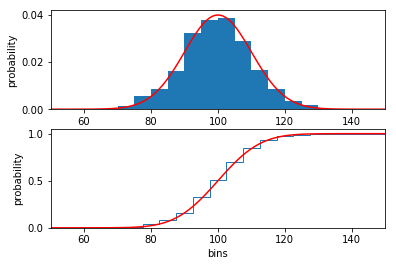

In [17]:
from scipy.stats import norm
mu = 100.0
sig = 10.0
data = sig * rnd.standard_normal(1000) + mu
print('mean of data is:', np.mean(data))
print('standard devaiation of data is:', np.std(data))
plt.subplot(211)
a = plt.hist(data, bins=20, range=(50, 150), normed=True)
x = np.linspace(50, 150, 100)
y = norm.pdf(x, mu, sig)
plt.plot(x, y, 'r')
plt.xlim(50, 150)
plt.ylabel('probability')
plt.subplot(212)
b = plt.hist(data, bins=20, range=(50, 150), cumulative=True, histtype='step', normed=True, align='right')
y = norm.cdf(x, mu, sig)
plt.plot(x, y, 'r')
plt.xlim(50, 150)
plt.xlabel('bins')
plt.ylabel('probability');

<a href="#back1">Back to Exercise 1</a>

<a name="ex2answer">Answers to Exercise 2</a>

theoretical IQR: 17.3 22.7
IQR of data  16.6812350038 22.5296106987


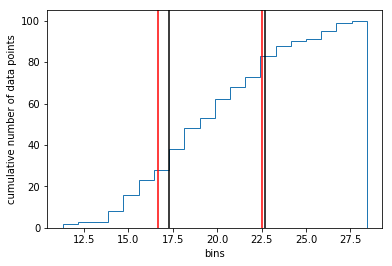

In [18]:
mu = 20.0
sig = 4.0
lower_theoretical = mu - 0.675 * sig
upper_theoretical = mu + 0.675 * sig
print('theoretical IQR:', lower_theoretical, upper_theoretical)
data = sig * rnd.standard_normal(100) + mu
lower, upper = np.percentile(data, [25, 75])
print('IQR of data ', lower, upper)
plt.hist(data, bins=20, cumulative=True, histtype='step')
plt.axvline(lower, color='r')
plt.axvline(upper, color='r')
plt.axvline(lower_theoretical, color='k')
plt.axvline(upper_theoretical, color='k')
plt.xlabel('bins')
plt.ylabel('cumulative number of data points');

<a href="#back2">Back to Exercise 2</a>

<a name="ex3answer">Answers to Exercise 3</a>

In [19]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)
print('min and max bending strength: ', w.bstrength.min(), w.bstrength.max())
print('mean and std of density: ', w.density.mean(), w.density.std())
print('2.5%, 50%, 97.5% tree ring width: ', np.percentile(w.treering,[2.5,50,97.5]))

min and max bending strength:  15.66 101.53
mean and std of density:  575.7247191011236 62.0073830786214
2.5%, 50%, 97.5% tree ring width:  [ 2.0475   3.78     7.00875]


In [20]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)
print('2.5%, 50%, 97.5% tree ring width: ', w.treering.describe(percentiles=[0.025,0.5,0.975]))

2.5%, 50%, 97.5% tree ring width:  count    356.000000
mean       3.954129
std        1.296985
min        1.640000
2.5%       2.047500
50%        3.780000
97.5%      7.008750
max        9.000000
Name: treering, dtype: float64


<a href="#back3">Back to Exercise 3</a>

<a name="ex4answer">Answers to Exercise 4</a>

mean moisture content:  13.553932584269662
standard deviation of moisture content:  1.7931673875992056


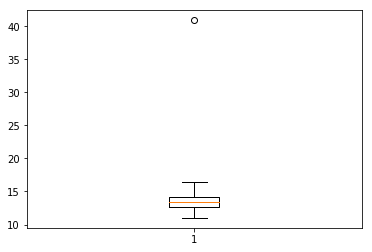

In [21]:
print('mean moisture content: ', w.moisture.mean())
print('standard deviation of moisture content: ', w.moisture.std())
a = plt.boxplot(w.moisture)

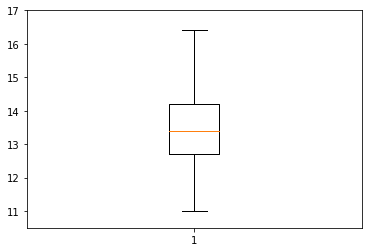

In [22]:
plt.boxplot(w.moisture[w.moisture < 30])
plt.ylim(10.5, 17);

<a href="#back4">Back to Exercise 4</a>

<a name="ex5answer">Answers to Exercise 5</a>

5 empirical percentile:  22.412499999999998


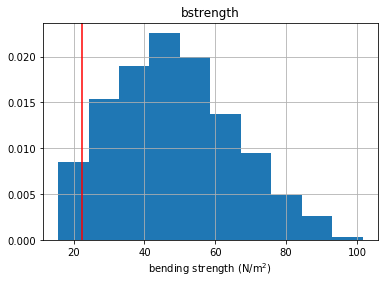

In [23]:
w.hist(column='bstrength', normed=True)
plt.xlabel('bending strength (N/m$^2$)')
five = w.bstrength.quantile(0.05)
print('5 empirical percentile: ', five)
plt.axvline(five, color='r');

<a href="#back5">Back to Exercise 5</a>

<a name="ex6answer">Answers to Exercise 6</a>

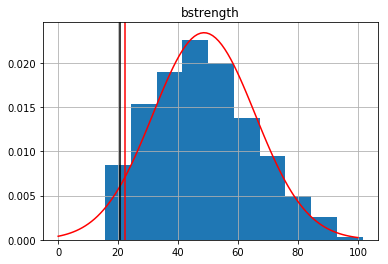

In [24]:
from scipy.stats import norm
w.hist(column='bstrength', normed=True)
meanstrength = w.bstrength.mean()
stdstrength = w.bstrength.std()
x = np.linspace(0, 100, 100)
y = norm.pdf(x, loc=meanstrength, scale=stdstrength)
plt.plot(x, y, 'r')
plt.axvline(five, color='r')
plt.axvline(meanstrength - 1.64 * stdstrength, color='k');

<a href="#back6">Back to Exercise 6</a>